# Scikit-learn
## Overview
Scikit learn is a free open source machine learning library for the Python programming language. It offers both supervised and unsupervised learning algorithms while being focused on modelling data.

# Mean-Shift Clustering Algorithm



# Overview
Meanshift is a popular unsupervised clustering algorithm. It may also be reffered to as the Mode-seeking algorithm as it assigns data points to clusters iteratively by shifting points towards the mode. The mode is the region containing the highest density of data points. Some examples of where the Mean-Shift algorithm is applied are the fields of computer vision, image processing and search engines.

## Advantages
- Meanshift is Model-Free as it does not need to assume any prior shape on data clusters.
- Only needs the window size (bandwidth) as a single parameter h
- Does not need a predetermined number of clusters as it uses the desnisty of points to generate the number of clusters.

## Disadvantages
- Output depends on window size
- It is cumputationally expensive as its process is calculation intensive.
- Excecution time can be rather slow for problems with a large nuber of data points

## How it works
1. Start with data points assigned to their own clusters
2. Computes all the centroids
3. Updates the location of the newly created centroids.
4. This proccess will be repeated moving the centroids to the higher density region
5. Finnaly, the process will be stopped once the centroids can no longer be moved further

## Classification: Sudents Performance Dataset

In [1]:
# Numerical arrays
import numpy as np

# Data frames
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Logistic regression
import sklearn.linear_model as lm

# K nearest neaighbours
import sklearn.neighbors as nei

# Helper functions
import sklearn.model_selection as mod

# Fancier, statistical plots
import seaborn as sns

In [2]:
# Standard plot size
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

In [16]:
# Load the iris data set from a URL
df = pd.read_csv("https://raw.githubusercontent.com/DavidOLoughran/G00362038/master/BankNote_Authentication.csv")

In [17]:
# Have a look at the data.
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [18]:
# Summary statistics
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Visualise the data

In [18]:
# Scatter plots and kdes
sns.pairplot(df, hue='class');

NameError: name 'df' is not defined

### Two Dimensions

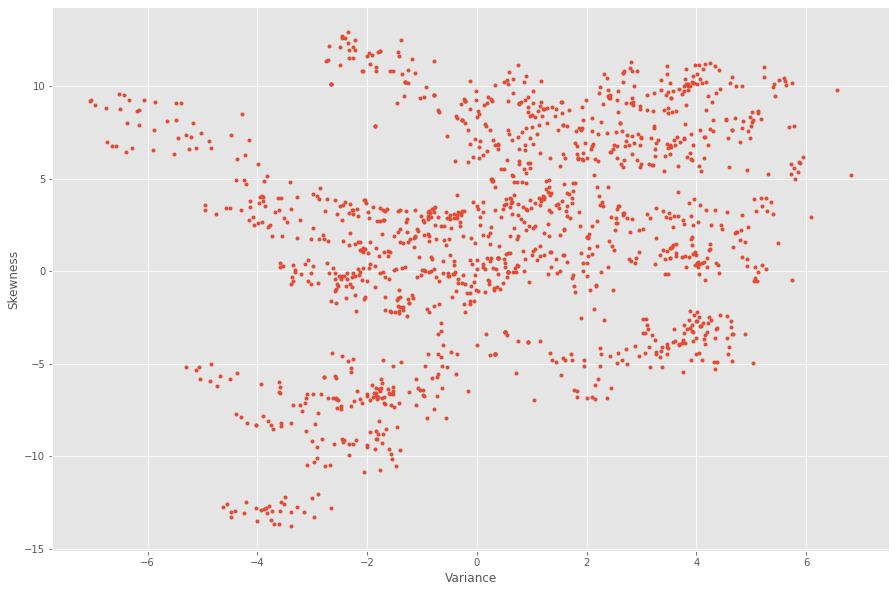

In [21]:
# New figure
fig, ax = plt.subplots()

# Scatter plot
ax.plot(df['variance'], df['skewness'], '.')

# Set axis labels
ax.set_xlabel('Variance');
ax.set_ylabel('Skewness');

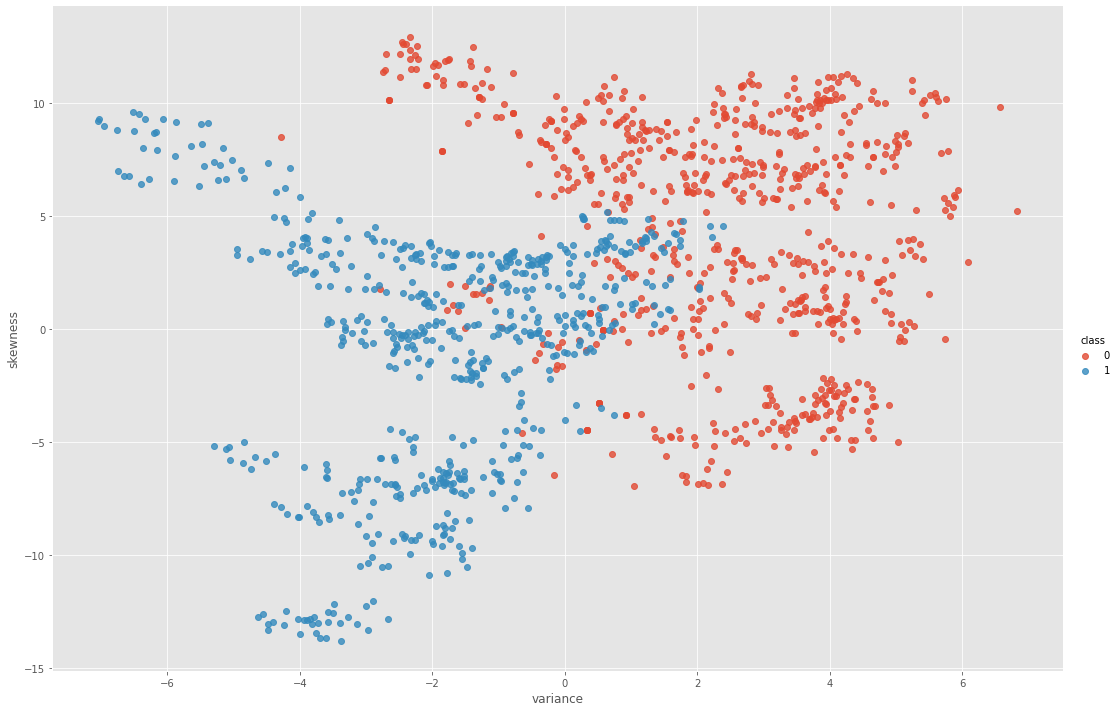

In [23]:
# Seaborn is great for creating complex plots with one command
sns.lmplot(x="variance", y="skewness", hue='class', data=df, fit_reg=False, height=10, aspect=1.5);

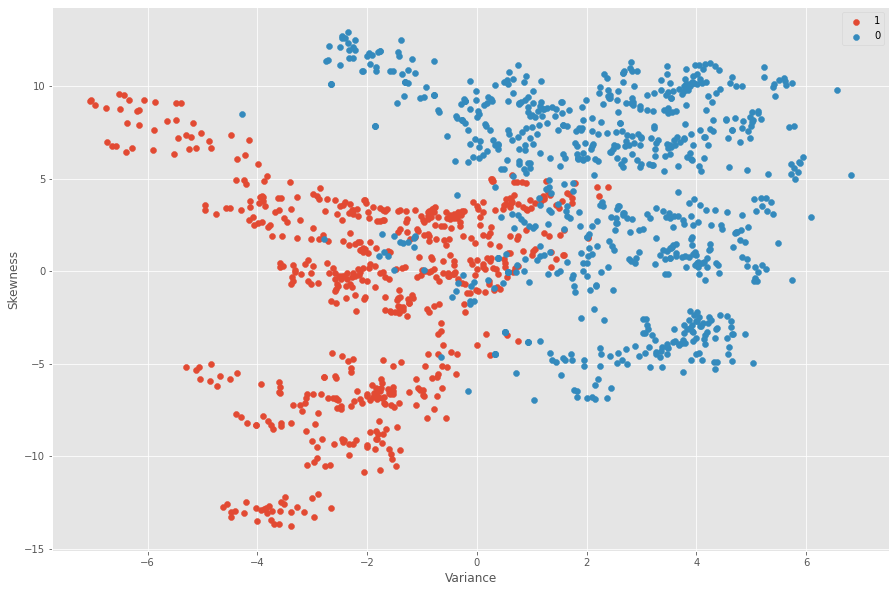

In [27]:
# Segregate the data.
setos = df[df['class'] == 1]
versi = df[df['class'] == 0]


# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(setos['variance'], setos['skewness'], label='1')
ax.scatter(versi['variance'], versi['skewness'], label='0')


# Show the legend.
ax.set_xlabel('Variance')
ax.set_ylabel('Skewness')
ax.legend();

In [29]:
# How the segregation works
df['class'] == 1

0       False
1       False
2       False
3       False
4       False
        ...  
1367     True
1368     True
1369     True
1370     True
1371     True
Name: class, Length: 1372, dtype: bool

In [30]:
df[df['class'] == 1].head()

,variance,skewness,curtosis,entropy,class
762,-1.39710,3.31910,-1.392700,-1.99480,1
763,0.39012,-0.14279,-0.031994,0.35084,1
764,-1.66770,-7.15350,7.892900,0.96765,1
765,-3.84830,-12.80470,15.682400,-1.28100,1
766,-3.56810,-8.21300,10.083000,0.96765,1


### Using groupby()

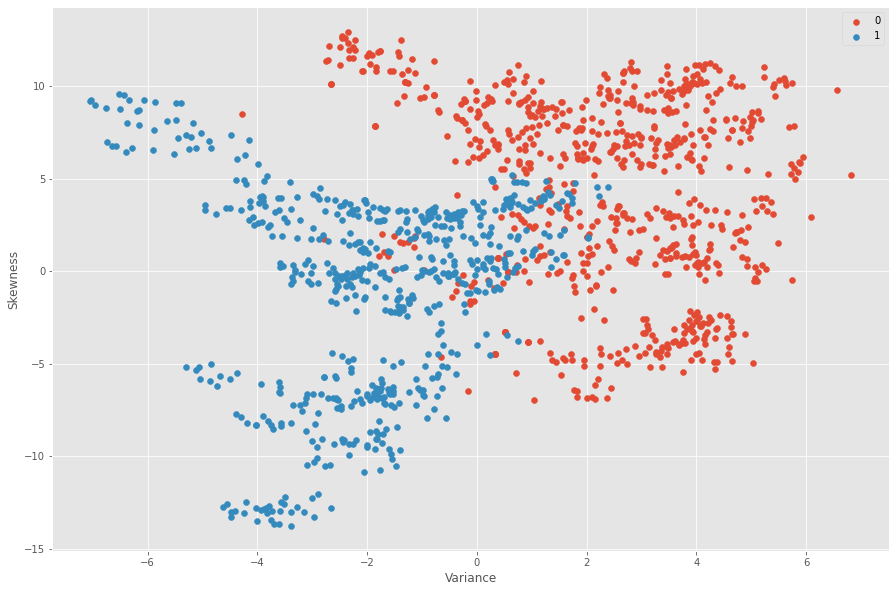

In [32]:
# New plot
fig, ax = plt.subplots()

# Using pandas groupby()
for preperation, data in df.groupby('class'):
    ax.scatter(data['variance'], data['skewness'], label=preperation)

# Show the legend
ax.set_xlabel('Variance')
ax.set_ylabel('Skewness')
ax.legend();

In [33]:
# Group by typically takes a categorical variable.
x = df.groupby('class')
x

In [34]:
# Pivot tables.
x.mean()

,variance,skewness,curtosis,entropy
class,,,,
0,2.276686,4.256627,0.796718,-1.147640
1,-1.868443,-0.993576,2.148271,-1.246641


In [35]:
# Looping through groupby()
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: '0'
j looks like:
   variance  skewness  curtosis  entropy  class
0    3.6216    8.6661   -2.8073 -0.44699      0
1    4.5459    8.1674   -2.4586 -1.46210      0
2    3.8660   -2.6383    1.9242  0.10645      0


i is: '1'
j looks like:
     variance  skewness  curtosis  entropy  class
762  -1.39710   3.31910 -1.392700 -1.99480      1
763   0.39012  -0.14279 -0.031994  0.35084      1
764  -1.66770  -7.15350  7.892900  0.96765      1



### Test and Train Split

In [36]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [37]:
# Show some training data.
train.head()

,variance,skewness,curtosis,entropy,class
1079,0.12126,0.22347,-0.47327,0.97024,1
1034,0.67886,4.11990,-4.56900,-4.14140,1
1070,-3.14230,-13.03650,15.67730,-0.66165,1
35,2.43910,6.44170,-0.80743,-0.69139,0
354,3.54580,9.37180,-4.03510,-3.95640,0


In [38]:
# The indices of the train array.
train.index

Int64Index([1079, 1034, 1070,   35,  354,   53, 1282,  628,  793, 1074,
            ...
            1315,  619, 1045,    5,  955,  420, 1131,  928, 1019,  708],
           dtype='int64', length=1029)

In [39]:
# Show some testing data.
test.head()


,variance,skewness,curtosis,entropy,class
45,-0.7869,9.5663,-3.78670,-7.50340,0
203,4.1757,10.2615,-3.85520,-4.30560,0
443,3.6702,2.9942,0.85141,0.30688,0
166,1.1166,8.6496,-0.96252,-1.81120,0
323,3.8840,10.0277,-3.92980,-4.08190,0


In [40]:
test.index.size

343

### Two Dimensions: Inputs and Outputs

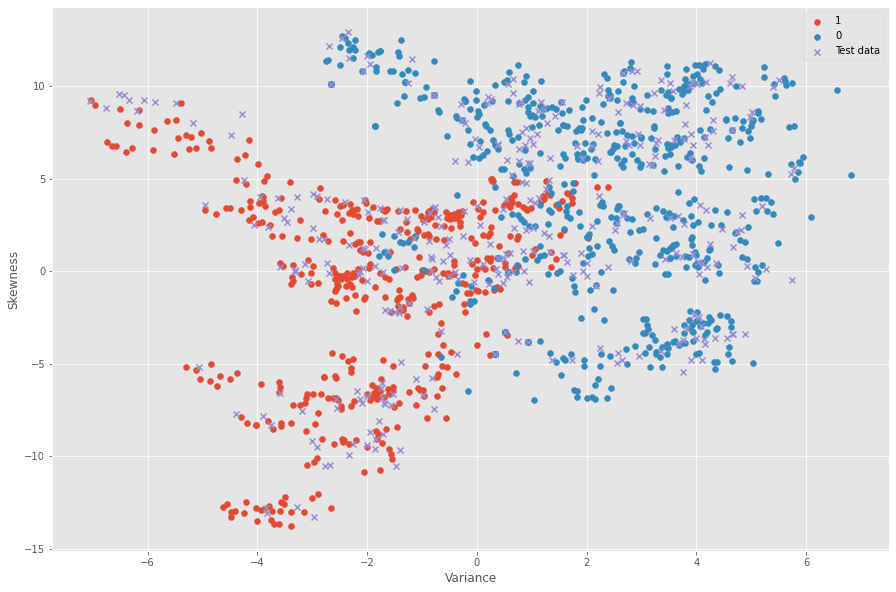

In [42]:
# Segregate the data.
setos = train[train['class'] == 1]
versi = train[train['class'] == 0]


# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(setos['variance'], setos['skewness'], marker='o', label='1')
ax.scatter(versi['variance'], versi['skewness'], marker='o', label='0')

# Scatter plot for testing data.
ax.scatter(test['variance'], test['skewness'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Variance')
ax.set_ylabel('Skewness')
ax.legend();

### Two Dimensions: Inputs and outputs

In [43]:
# Give the inputs and outputs convenient names
inputs, outputs = train[['variance', 'skewness']], train['class']

In [44]:
# Peek at the inputs.
inputs.head()

,variance,skewness
1079,0.12126,0.22347
1034,0.67886,4.11990
1070,-3.14230,-13.03650
35,2.43910,6.44170
354,3.54580,9.37180


In [45]:
# Peek at the outputs.
outputs.head()

1079    1
1034    1
1070    1
35      0
354     0
Name: class, dtype: int64

### Two Dimensions: Logistic regression

In [46]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0, solver='lbfgs', max_iter=5000)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(max_iter=5000, random_state=0)

In [47]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['variance', 'skewness']])
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [48]:
# Eyeball the misclassifications.
predictions == test['class']

45       True
203      True
443      True
166      True
323      True
        ...  
1338    False
655      True
604     False
893      True
201      True
Name: class, Length: 343, dtype: bool

In [49]:
# What proportion were correct?
lre.score(test[['variance', 'skewness']], test['class'])

0.8950437317784257

In [50]:
# Append a column to the test data frame with the predictions.
test['predicted'] = predictions
test.head()

,variance,skewness,curtosis,entropy,class,predicted
45,-0.7869,9.5663,-3.78670,-7.50340,0,0
203,4.1757,10.2615,-3.85520,-4.30560,0,0
443,3.6702,2.9942,0.85141,0.30688,0,0
166,1.1166,8.6496,-0.96252,-1.81120,0,0
323,3.8840,10.0277,-3.92980,-4.08190,0,0


In [51]:
# Show the misclassified data.
misclass = test[test['predicted'] != test['class']]
misclass

,variance,skewness,curtosis,entropy,class,predicted
667,-0.048008,-0.560780,7.72150,0.453000,0,1
844,0.009661,3.561200,-4.40700,-4.410300,1,0
1312,0.559390,-0.310400,0.18307,0.446530,1,0
233,0.469010,-0.633210,7.38480,0.365070,0,1
1345,2.227900,4.095100,-4.80370,-2.111200,1,0
797,0.815830,4.840000,-5.26130,-6.082300,1,0
21,0.329200,-4.455200,4.57180,-0.988800,0,1
1216,0.600500,0.999450,-2.21260,0.097399,1,0
1351,1.318300,1.901700,-3.31110,0.065071,1,0
818,0.243940,1.473300,-1.41920,-0.585350,1,0


In [53]:
# Eyeball the descriptive statistics for the species.
train.groupby('class').mean()

,variance,skewness,curtosis,entropy
class,,,,
0,2.262017,4.171616,0.870841,-1.153657
1,-1.881918,-1.095390,2.264336,-1.265082


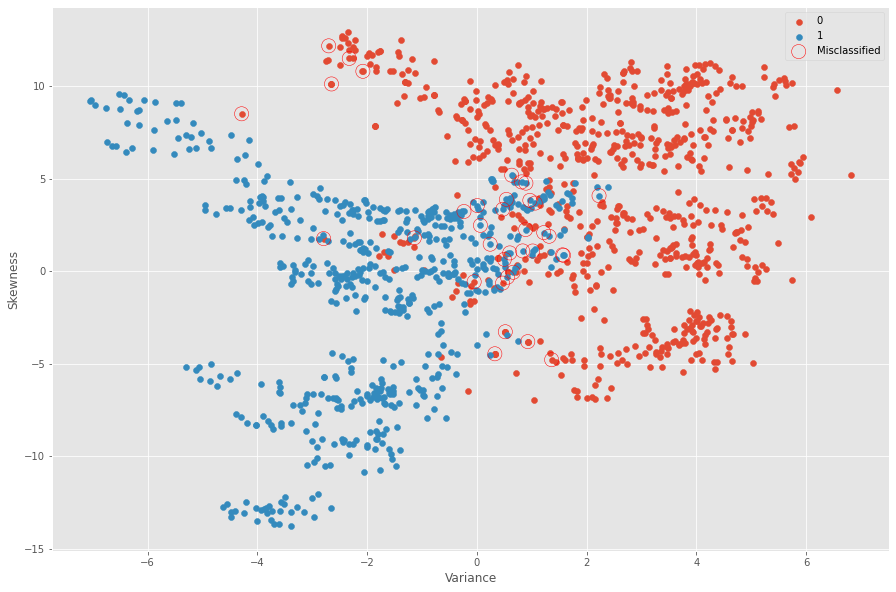

In [55]:
# New plot.
fig, ax = plt.subplots()

# Plot the training data
for species, data in df.groupby('class'):
    ax.scatter(data['variance'], data['skewness'], label=species)
    
# Plot misclassified.
ax.scatter(misclass['variance'], misclass['skewness'], s=200, facecolor='none', edgecolor='r', label='Misclassified')

# Show the legend.
ax.set_xlabel('Variance')
ax.set_ylabel('Skewness')
ax.legend();

In [57]:
# Load the iris data set from a URL.
df = pd.read_csv("https://raw.githubusercontent.com/DavidOLoughran/G00362038/master/BankNote_Authentication.csv")

In [58]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [60]:
# Use all four possible inputs.
inputs, outputs = train[['variance', 'skewness', 'curtosis', 'entropy']], train['class']

In [61]:
# Create a new classifier.
lre = lm.LogisticRegression(random_state=0)

# Train the classifier on our data.
lre.fit(inputs, outputs)

LogisticRegression(random_state=0)

In [63]:
# Ask the classifier to classify the test data.
predictions = lre.predict(test[['variance', 'skewness', 'curtosis', 'entropy']])
predictions

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,

In [64]:
# Eyeball the misclassifications.
(predictions == test['class']).value_counts()

True     341
False      2
Name: class, dtype: int64

In [66]:
# What proportion were correct?
lre.score(test[['variance', 'skewness', 'curtosis', 'entropy']], test['class'])

0.9941690962099126

## Image Segmentation: Meanshift 

In [3]:
import numpy as np
import pandas as pd
import cv2
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import filters
from skimage import util
from sklearn.datasets import load_sample_image
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift, estimate_bandwidth
import warnings
warnings.filterwarnings("ignore")

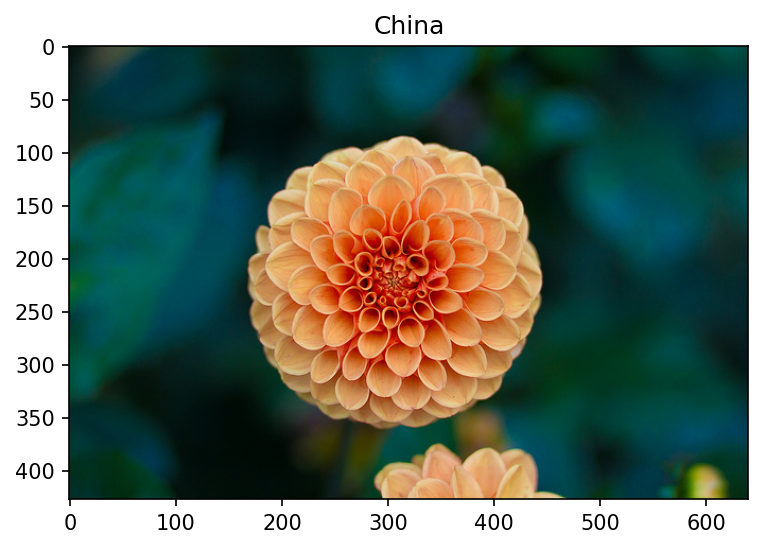

In [4]:
image = load_sample_image('flower.jpg')
#image.squeeze().permute(1,2,0)
image = np.array(image, dtype=np.float64) / 255
reshape_img = np.reshape(image, [-1, 3])
plt.figure(dpi=150)
plt.title('China')
plt.imshow(image)

In [5]:
index = pd.MultiIndex.from_product(
    (*map(range, image.shape[:2]), ('r', 'g', 'b')),
    names=('row', 'col', None))

In [6]:
df_1 = pd.Series(image.flatten(), index=index)
df_1 = df_1.unstack()
df_1 = df_1.reset_index().reindex(columns=['col','row',   'r','g','b'])
df_1.head(10)

,col,row,r,g,b
0,0,0,0.007843,0.074510,0.050980
1,1,0,0.011765,0.070588,0.050980
2,2,0,0.027451,0.078431,0.050980
3,3,0,0.031373,0.082353,0.054902
4,4,0,0.023529,0.082353,0.054902
5,5,0,0.015686,0.082353,0.058824
6,6,0,0.019608,0.082353,0.070588
7,7,0,0.031373,0.090196,0.078431
8,8,0,0.023529,0.086275,0.082353
9,9,0,0.035294,0.094118,0.082353


In [7]:
df_2 = df_1[['r', 'g', 'b']]
df_2.head(10)

,r,g,b
0,0.007843,0.074510,0.050980
1,0.011765,0.070588,0.050980
2,0.027451,0.078431,0.050980
3,0.031373,0.082353,0.054902
4,0.023529,0.082353,0.054902
5,0.015686,0.082353,0.058824
6,0.019608,0.082353,0.070588
7,0.031373,0.090196,0.078431
8,0.023529,0.086275,0.082353
9,0.035294,0.094118,0.082353


In [8]:
nd_1 = df_1.values.astype(np.float32)
nd_1[:, 0] = nd_1[:, 0] / (nd_1[:, 0].max() + 1)
nd_1[:, 1] = nd_1[:, 1] / (nd_1[:, 1].max() + 1)
nd_1[:, 2:] = nd_1[:, 2:] / 255
nd_2 = df_2.astype(np.float64) / 255

In [9]:
nd_1 = MinMaxScaler(feature_range=(0, 1)).fit_transform(df_1)
nd_2 = MinMaxScaler(feature_range=(0, 10)).fit_transform(df_2)


In [10]:
bandwidth_1 = estimate_bandwidth(nd_1, quantile=0.4, n_samples=3000)
bandwidth_2 = estimate_bandwidth(nd_1, quantile=0.4, n_samples=3000)

In [11]:
ms_1 = MeanShift(bandwidth = bandwidth_1 , n_jobs=-1, bin_seeding=True, cluster_all=True).fit(nd_1)
ms_2 = MeanShift(bandwidth = bandwidth_2 , n_jobs=-1, bin_seeding=True, cluster_all=True).fit(nd_2)

In [12]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

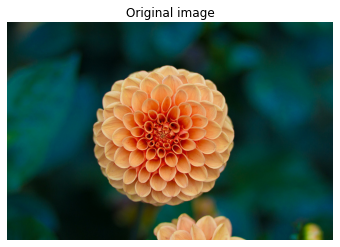

In [13]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image', loc='center')
plt.imshow(image)

In [14]:
w, h, d = original_shape = tuple(image.shape)
print(w + h)

1067


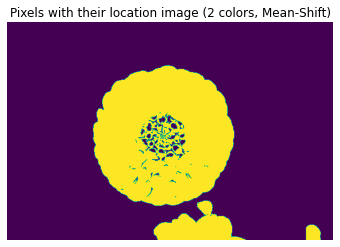

In [15]:
plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Pixels with their location image ({} colors, Mean-Shift)'.format(len(ms_1.cluster_centers_)), loc='center')



res = recreate_image(ms_1.cluster_centers_, ms_1.labels_, w, h)

# plt.imshow(recreate_image(ms_1.cluster_centers_, ms_1.labels_, w, h))

shape = image.shape
labels = ms_1.labels_
result_image = np.reshape(labels, shape[:2])

plt.imshow(result_image)



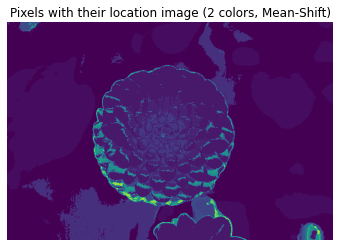

In [16]:
plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Pixels with their location image ({} colors, Mean-Shift)'.format(len(ms_1.cluster_centers_)), loc='center')



# res = recreate_image(ms_1.cluster_centers_, ms_1.labels_, w, h)

# plt.imshow(recreate_image(ms_1.cluster_centers_, ms_1.labels_, w, h))

shape = image.shape
labels = ms_2.labels_
result_image = np.reshape(labels, shape[:2])

plt.imshow(result_image)

## Regression: Real Estate dataset

In [19]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Fancier, statistical plots.
import seaborn as sns

In [20]:
# Plots styles.
plt.style.use('ggplot')

# Plot size.
plt.rcParams['figure.figsize'] = (12, 8)

In [22]:
# Load the dataset  
df = pd.read_csv("https://raw.githubusercontent.com/DavidOLoughran/EmergingTechProject/main/Datasets/Real%20estate.csv")

In [23]:
# Have a look at the data.
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [24]:
# Summary statistics
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


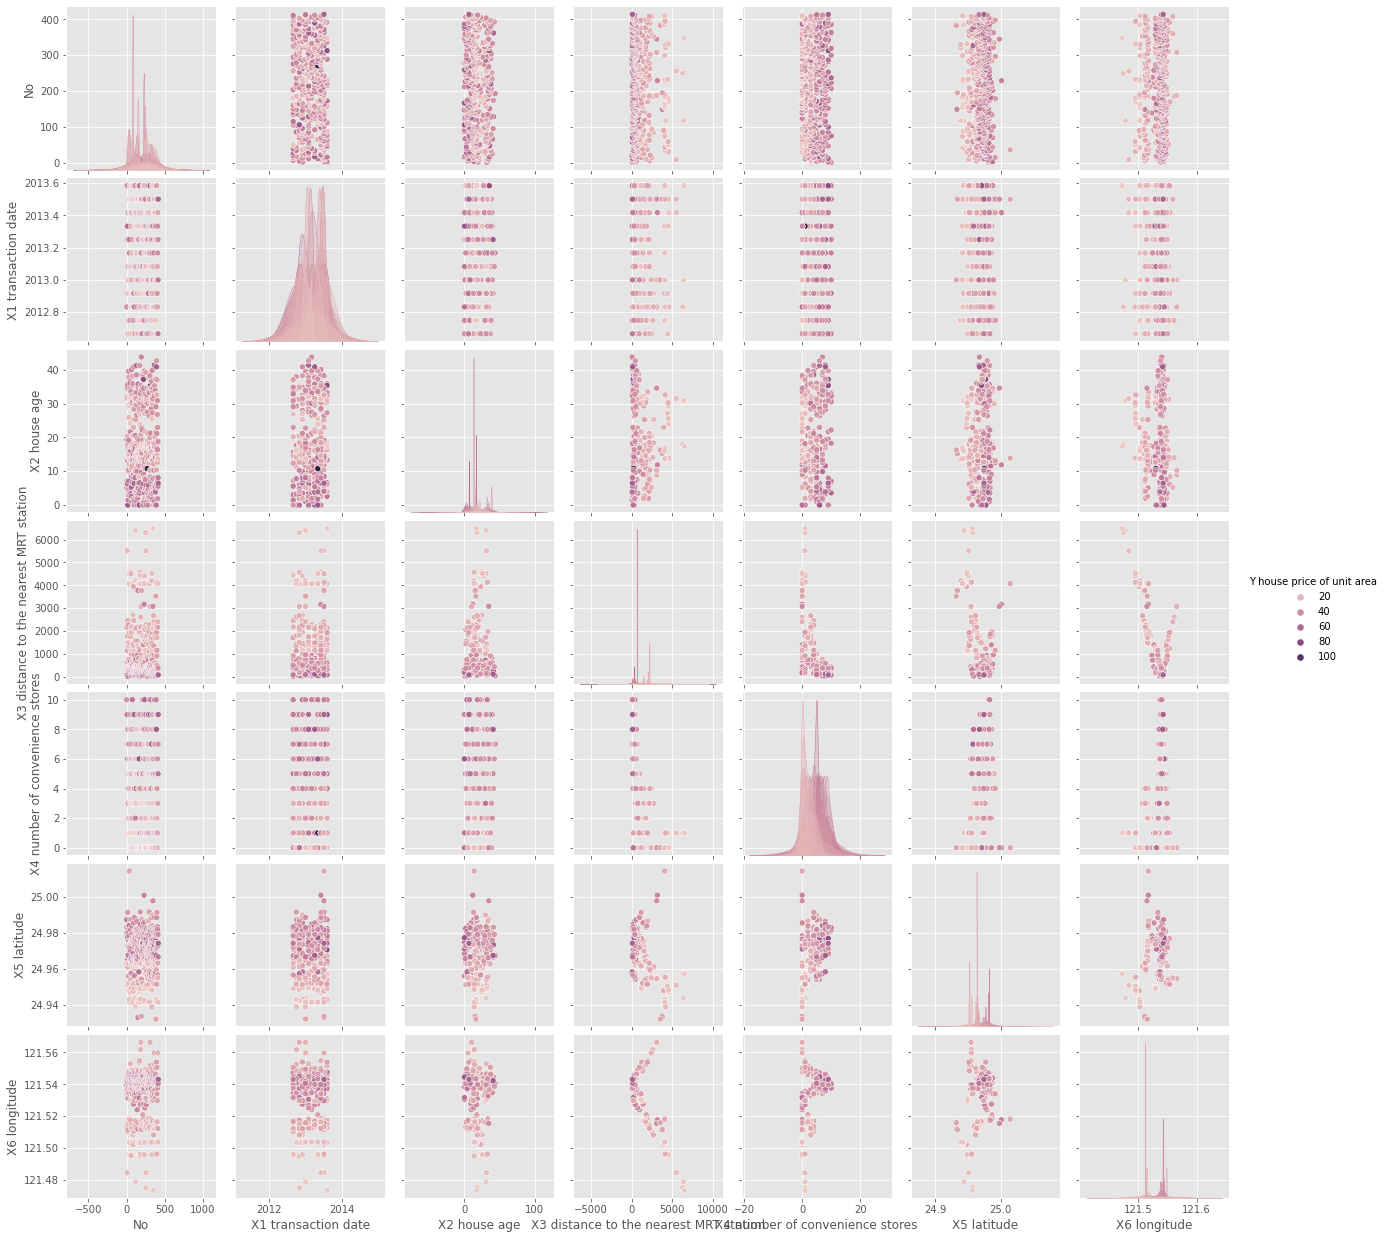

In [26]:
# Scatter plots and kdes
sns.pairplot(df, hue='Y house price of unit area');

<AxesSubplot:>

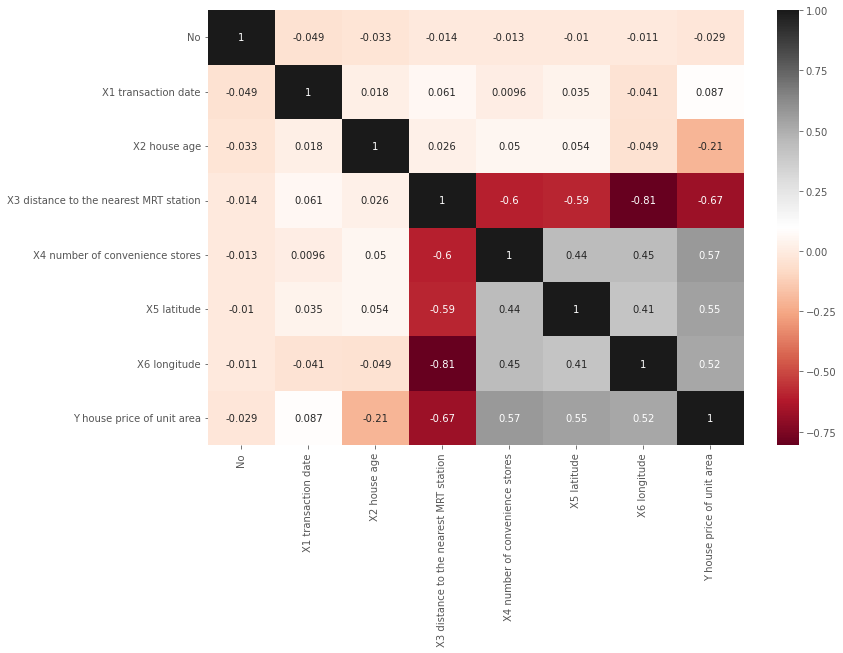

In [30]:
#Plot figsize
plt.figure(figsize=(12, 8))
# Generate heat map
sns.heatmap(df.corr(),annot=True,cmap="RdGy")